### Team Info
- Title: F1 Analysis
- Team Name: Accelerated Analytics
- Name: Jacob Thomas

### Project Introduction
#### Description
We will use various F1 metrics, including telemetry, weather, and tyre data, to analyze driver and car performance throughout the season and over the years.

#### Research Questions
- How do different countries compare in terms of total percentage of drivers and win rate.

#### Data Source(s)
I used data sources from https://www.kaggle.com/code/jonathanbouchet/f1-data-analysis/data

In [6]:
import numpy
import pandas
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import string

I am using two different data tables one has drivers and driver standings. I will be conducting an analysis on players nationality and the place their drivers place in.

In [30]:
drivers = pandas.read_csv("drivers.csv") 
drivers = drivers.drop(columns = ["url"])
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese


In [29]:
standings = pandas.read_csv("driver_standings.csv") 
standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33833,71768,1094,4,71.0,9,9,0
33834,71769,1094,855,6.0,18,18,0
33835,71770,1094,854,12.0,16,16,0
33836,71771,1094,840,13.0,15,15,0


In [28]:
#merging the dataframes based on driverID
df = drivers.merge(standings, on = 'driverId')
df

,driverId,driverRef,number,code,forename,surname,dob,nationality,driverStandingsId,raceId,points,position,positionText,wins
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,1,18,10.0,1,1,1
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,9,19,14.0,1,1,1
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,27,20,14.0,3,3,1
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,48,21,20.0,2,2,1
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,69,22,28.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33833,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,71627,1089,2.0,20,20,0
33834,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,71649,1091,2.0,20,20,0
33835,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,71693,1092,2.0,21,21,0
33836,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,71759,1093,2.0,21,21,0


In [50]:
#this groups the drivers by majority 
country = df.groupby('nationality').driverRef.nunique().reset_index() 
country = country.rename(columns = {'driverRef':'Count'})
Countholder = country.Count
sumHolder = [i for i in country.Count if i < 32]
summer = sum(sumHolder)
countryGraph = country.loc[[0, 7, 8, 18, 19, 24]]
countryGraph.loc[len(countryGraph.index)] = ['Others', summer]
countryGraph

,nationality,Count
0,American,157
7,Brazilian,32
8,British,164
18,French,72
19,German,49
24,Italian,96
6,Others,278


([<matplotlib.patches.Wedge at 0x26de67cc280>,
 [Text(0.9191195333758521, 0.6043337516364249, 'American'),
  Text(0.31345872518803297, 1.0543925396186629, 'Brazilian'),
  Text(-0.4657006440846611, 0.9965555228381066, 'British'),
  Text(-1.0632183141967761, 0.2820759053101945, 'French'),
  Text(-1.0804242416054812, -0.206599753512004, 'German'),
  Text(-0.8225298156249334, -0.730372988553118, 'Italian'),
  Text(0.5663866274571258, -0.942977299958882, 'Others')],
 [Text(0.5013379272959192, 0.3296365918016863, '18.5%'),
  Text(0.17097748646619979, 0.5751232034283615, '3.8%'),
  Text(-0.25401853313708783, 0.5435757397298763, '19.3%'),
  Text(-0.5799372622891505, 0.15385958471465153, '8.5%'),
  Text(-0.5893223136029897, -0.11269077464291126, '5.8%'),
  Text(-0.4486526267045091, -0.3983852664835189, '11.3%'),
  Text(0.30893816043115946, -0.5143512545230264, '32.8%')])

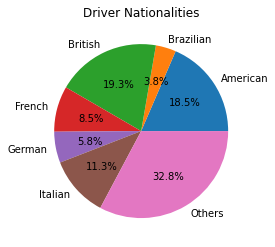

In [56]:
#this plots the percentage of drivers and nationality
plt.title('Driver Nationalities')
plt.pie(countryGraph.Count, labels= countryGraph.nationality, autopct='%1.1f%%')

In [69]:
# Number of wins of the big six countries and the others 
winners = pandas.DataFrame()
winners['Italian'] = [df.loc[df['nationality'] == 'Italian', 'wins'].sum()]
winners['German'] = df.loc[df['nationality'] == 'German', 'wins'].sum()
winners['French'] = df.loc[df['nationality'] == 'French', 'wins'].sum()
winners['British'] = df.loc[df['nationality'] == 'British', 'wins'].sum()
winners['Brazilian'] = df.loc[df['nationality'] == 'Brazilian', 'wins'].sum()
winners['American'] = df.loc[df['nationality'] == 'American', 'wins'].sum()
print(American+Italian+German+British+Brazilian+French)
total = df.wins.sum()
winners['Others'] = total - (American+Italian+German+British+Brazilian+French)
winners

6341
1746


,Italian,German,French,British,Brazilian,American,Others
0,281,1746,730,2506,853,225,2732


([<matplotlib.patches.Wedge at 0x26de7058760>,
 [Text(1.094797278146554, 0.10685934569749614, 'Italian'),
  Text(0.767038444653931, 0.7884491260841618, 'German'),
  Text(-0.09415324992077354, 1.0959631223400523, 'French'),
  Text(-1.027689603029913, 0.39224237382544525, 'British'),
  Text(-0.767584306718564, -0.7879177191048451, 'Brazilian'),
  Text(-0.42740921935662246, -1.013568625801412, 'American'),
  Text(0.6434475683398518, -0.8921744374266347, 'Others')],
 [Text(0.5971621517163022, 0.058286915834997885, '3.1%'),
  Text(0.4183846061748714, 0.4300631596822701, '19.2%'),
  Text(-0.05135631813860374, 0.5977980667309376, '8.0%'),
  Text(-0.5605579652890433, 0.21395038572297012, '27.6%'),
  Text(-0.4186823491192167, -0.4297733013299155, '9.4%'),
  Text(-0.23313230146724856, -0.5528556140734974, '2.5%'),
  Text(0.3509714009126464, -0.4866406022327098, '30.1%')])

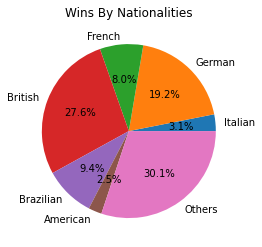

In [71]:
#plotting the number of wins with countries
plt.title('Wins By Nationalities')
plt.pie(winners.iloc[0], labels= winners.columns, autopct='%1.1f%%')

The analysis I just did was finding the percentage of riders based on country and the amount of wins that each country has. As we can see the Americans have the third highest percentage of drivers but has the lowest return of wins based on this. Further research can go into how Americans are training or how much money is being spent vs returned on these American cars. The best return based on percentage of drivers is Germany as they only have 5.8% of the drivers yet hold 19.2% of the total wins. This return on investment is amazing. Further research into this can go into the training on these drivers and the differences between German cars and drivers vs others such as Americans and try to understand the big discrepancy.